<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset.

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot

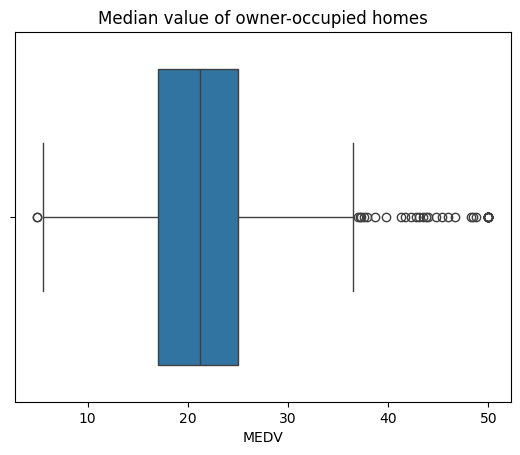

In [11]:
ax = sns.boxplot(x='MEDV' , data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

## Provide a  bar plot for the Charles river variable

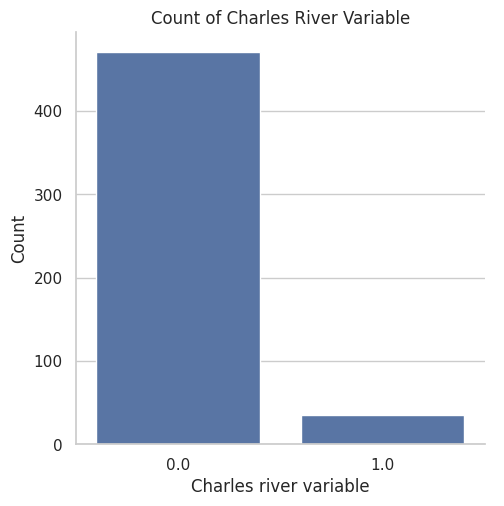

In [15]:
ax = sns.catplot(x="CHAS", kind = "count", data=boston_df)
ax.set(xlabel='Charles river variable',ylabel='Count')
plt.title("Count of Charles River Variable")
plt.show()

## Provide a boxplot for the MEDV variable vs the AGE variable.

<AxesSubplot:title={'center':'MEDV variable vs the AGE variable'}, xlabel='MEDV', ylabel='AGE_GROUP'>

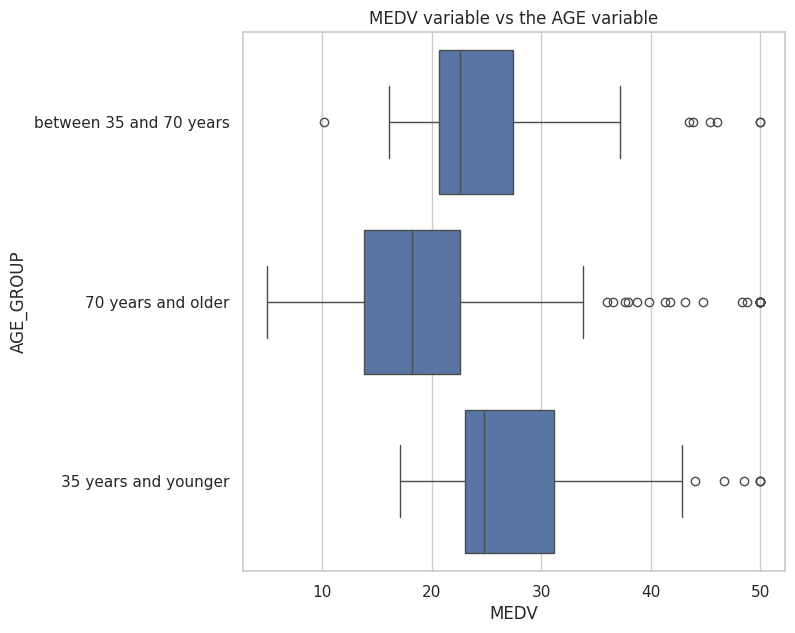

In [16]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

plt.figure(figsize=(7,7))
plt.title("MEDV variable vs the AGE variable")
sns.boxplot(x= "MEDV", y= "AGE_GROUP", data = boston_df)

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

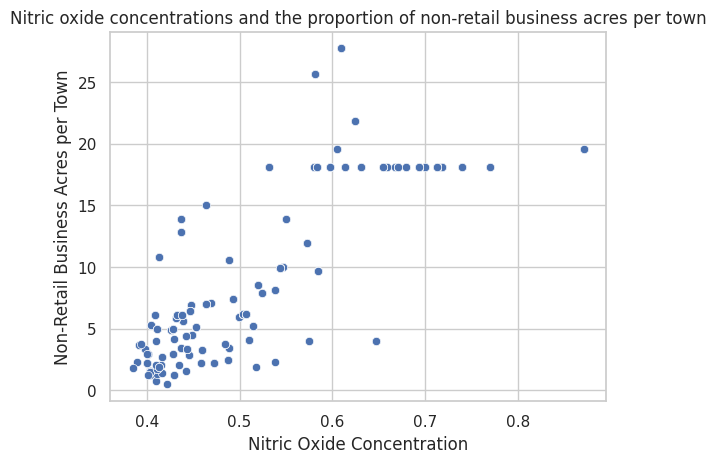

In [17]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

Conclusion : The NOX is positively correlated to INDUS. The graph show the increase in Nitric Oxide concentration as there is increase in non-retail business, but once the non retail business is greater than 15 the Nitric Oxide concentration become constant.

## Create a histogram for the pupil to teacher ratio variable.

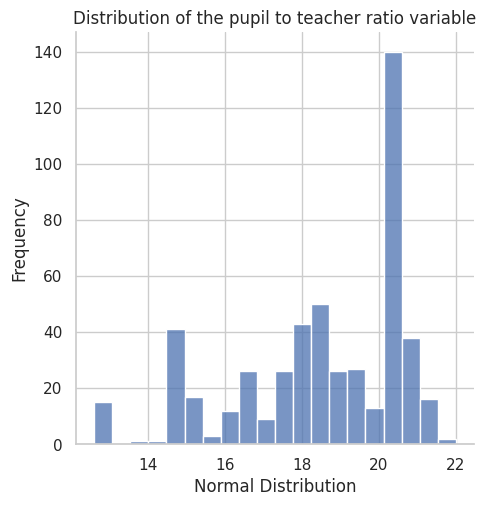

In [18]:
ax = sns.displot(x = boston_df["PTRATIO"], bins = 20, kde = False)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title = "Distribution of the pupil to teacher ratio variable")

# Task 3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not?

**State the Hypothesis :**

H_0 : µ_1 = µ_2 (There is no significant difference in median values of houses bounded by the Charles river)

H_1: µ_1 ≠ µ_2 (There is significant difference in median values of houses bounded by the Charles river)

In [19]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'

We will firstly do Levene's test

State the Hypothesis:
H_0: Equality of variance

H_1: Atleast one variance is not equal

In [21]:
scipy.stats.levene(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], center = "mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p = 0.03 < 0.05 thus there is inequality of variances.

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                   boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the value of p is less than alpha which is 0.05. So, we reject the null hypothesis, i.e. There is enough statistical proof that there is statiscal differnce in median values by Charlres river.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**State the Hypothesis:**

H_0: µ_1=µ_2=µ_3 (the three population means are equal) i.e. There is no significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

H_1: At least one of the means differ. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [23]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

Firstly we will do Levene's test...

State the Hypothesis:

H_0: Equality of variance

H_1: Atleast one variance is not equal

In [24]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

As p = 0.06 > 0.05 there is equality of variances.

In [25]:
thirtyfive_lower   = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older      = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [26]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion :** The p-value is less than alpha (0.05) So, we need to reject the null hypothesis. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

**State the Hypothesis:**

H_0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1: There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

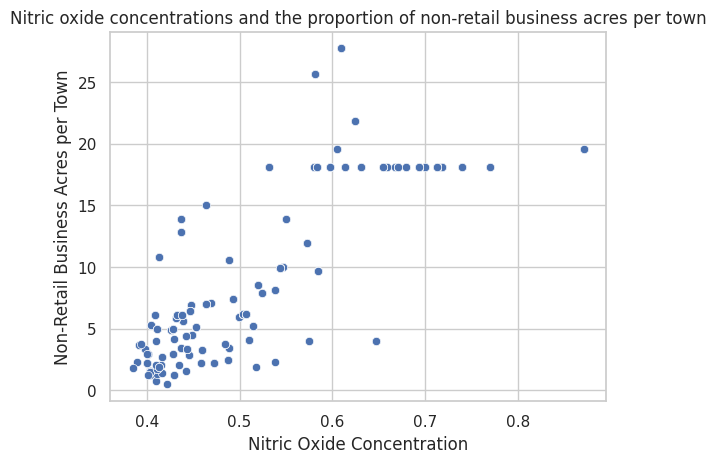

In [27]:
# Drawing sctterplot.
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion :** Since the p-value is less than alpha(0.05). We need to reject the null hypothesis. i.e. There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Basically, We can not conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

**State the Hypothesis:**

H_0: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are not correlated.

H_1: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.

In [29]:

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        00:56:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion :** Since the p-value is less than alpha(0.05), we reject the null hypothesis. i.e. Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.

The coefficient 1.0916 means that for MEDV increases by 1.0916 times for every 1 weighted distances to five Boston employment centres.

# THANK YOU
- Rohan Jagdish Sali.